# **Lab-1 Assignment: Logistic Regression**
---



**Submitted by:** Abhaya Shrestha  
**Roll No:** ACE079BCT005

---



## **Objective**

The goal of this assignment is to understand and apply the complete Machine Learning (ML) pipeline using Logistic Regression for a binary classification problem.

We perform two tasks:

1. Logistic Regression Using Single Feature  
2. Logistic Regression Using Multiple Features


## **Background**

***Artificial Intelligence (AI):***
+ Anything a machine does that looks like a human task — could be simple code, rules, or a smart system.
+ Example: A program that sends a reminder email when a due date passes. It's "AI" if we call that behavior intelligent.

***Machine Learning (ML):***
+ The system learns from data and finds patterns instead of being fully hard-coded.
+ Example: A model that looks at past invoices and learns which ones get paid late, then predicts future late payments.

***Deep Learning (DL):***
+ A kind of ML that uses deep neural networks (many layers) and often works directly with raw data (images, audio, text).
+ Example: A CNN that learns from raw photos to decide if there's a cat — it figures out edges, shapes, and features automatically.

***Data Science:***
+ The broader process around data — collecting, cleaning, exploring, visualizing, and using ML/DL to answer questions and make decisions.
+ Example: Inspecting sales data, cleaning it, plotting trends, building a model to forecast demand, and reporting the result.

In summary,
+ AI = any machine behavior we call “intelligent.”
+ ML = AI that learns from data.
+ DL = ML using deep neural networks.
+ Data Science = turning data into insight (includes ML/DL)

## **Task 1: Logistic Regression with a Single Feature**

### 1. Data Retrieval and Collection

The Heart Disease dataset was retrieved from Kaggle and fed into the system. It is made up of medical attributes related to the state of a
person's cardiovascular system; that is, it has a target variable **Heart Disease** indicates the presence (1) or absence (0) of heart disease.



In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

# Load dataset
df = pd.read_csv("Heart_Disease_Prediction.csv")


In [3]:

# Display first 5 rows
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [4]:
# Display no of rows and columns
df.shape

(270, 14)

In [5]:
# Display column names
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='str')

### 2. Data Cleaning

The dataset is checked for missing values or other anomalies. The wrong cholesterol values are removed, data types are verified, and the
target variable is checked to make sure it is binary to be appropriate for logistic regression classification.

In [6]:
# Check missing values
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [7]:
# Check target distribution
df['Heart Disease'].value_counts()

Heart Disease
Absence     150
Presence    120
Name: count, dtype: int64

In [8]:
# Remove invalid cholesterol values
df = df[df['Cholesterol'] > 0]


In [9]:

# Check data types
df.dtypes

Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease                  str
dtype: object

### 3. Feature Design (Single Feature)

Only **Cholesterol** is used as the input feature because it is a known risk factor for heart disease.


In [10]:
X = df[['Cholesterol']]
y = df['Heart Disease']

In [11]:

# Encode target variable
label_mapping = {'Absence': 0, 'Presence': 1}
y = y.map(label_mapping)

### 4. Algorithm Selection

We use **Logistic Regression** because:
- It is designed for binary classification
- It outputs probabilities between 0 and 1


### 5. Loss Function Selection

**Binary Cross-Entropy (Log Loss)** is used as the loss function. It measures the difference between predicted probabilities and actual class
labels and strongly penalizes incorrect confident predictions. The choice of a loss function strictly depends on setting goals to be achieved by
working on them. In this context, it is most preferable in practice for the same to be minimized.

### 6. Model Learning (Training)

Data has been divided into two sets: training and testing sets. The logistic regression model is trained on the training data, during which it
optimizes feature weights to minimize the log loss by optimization techniques.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model_single = LogisticRegression()
model_single.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

### 7. Model Evaluation

To evaluate a model, several key metrics in machine learning, such as accuracy, precision, recall, F1-score, and the confusion matrix, are used.
These are useful in pointing out how well the model classifies correctly, whether a patient has heart disease or not.

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred = model_single.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print('\nf1:\t\t ',f1)
print('recall\t\t ',recall)
print('accuracy\t ',accuracy)
print('precision\t ',precision)
print('confusion matrix:\n',cm)



f1:		  0.3225806451612903
recall		  0.23809523809523808
accuracy	  0.6111111111111112
precision	  0.5
confusion matrix:
 [[28  5]
 [16  5]]


Here's the interpretation of these obtained results:
+ Precision = 0.5 (50%): This means that when your model predicts "Heart Disease Present," it's correct only 50% of the time. Out of 10
positive predictions (5 true positives + 5 false positives), only 5 were actually correct.
+ Recall = 0.238 (24%): The model only identifies 24% of actual heart disease cases. Out of 21 actual cases, it only catches 5.
+ Accuracy = 0.611 (61%): Overall, 61% of all predictions are correct, but this is misleading since the dataset is imbalanced.
+ F1-Score = 0.323: A low score combining precision and recall, showing the model performs poorly.
+ Confusion Matrix Analysis:
    + True Negatives (TN) = 28: Correctly predicted no disease
    + False Positives (FP) = 5: Incorrectly predicted disease
    + False Negatives (FN) = 16: Critical issue - missed 16 actual cases
    + True Positives (TP) = 5: Correctly predicted disease


### Sigmoid Curve Visualization

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


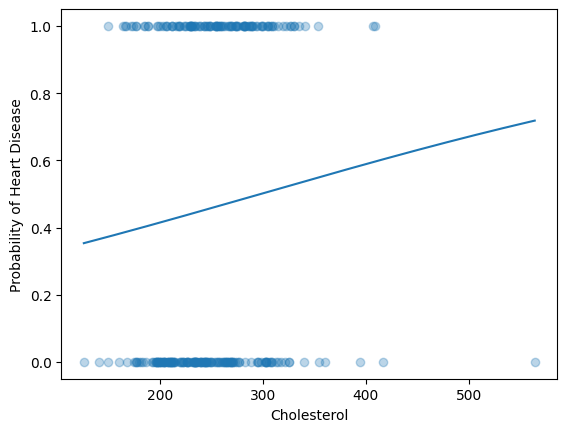

In [14]:
x_vals = np.linspace(X.min(), X.max(), 300)
y_vals = model_single.predict_proba(x_vals)[:,1]

plt.figure()
plt.scatter(X, y, alpha=0.3)
plt.plot(x_vals, y_vals)
plt.xlabel("Cholesterol")
plt.ylabel("Probability of Heart Disease")
plt.show()

---

## **Task 2: Logistic Regression Using Multiple Features**

In [15]:
# Reload dataset
df = pd.read_csv("Heart_Disease_Prediction.csv")
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


### Feature Design (Multiple Features)

Using multiple features allows the model to learn complex relationships and improves predictive performance.


In [16]:
X_multi = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']

# One-hot encoding for categorical variables
X_multi = pd.get_dummies(X_multi, drop_first=True)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_multi = scaler.fit_transform(X_multi)


In [17]:

# Encode target variable: convert string labels to numeric (0 or 1)
label_mapping = {'Absence': 0, 'Presence': 1}
y = y.map(label_mapping)

### Model Learning (Training)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X_multi, y, test_size=0.2, random_state=42
)

model_multi = LogisticRegression(max_iter=1000)
model_multi.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

### Model Evaluation

In [19]:
y_pred_multi = model_multi.predict(X_test)

accuracy_m = accuracy_score(y_test, y_pred_multi)
precision_m = precision_score(y_test, y_pred_multi)
recall_m = recall_score(y_test, y_pred_multi)
f1_m = f1_score(y_test, y_pred_multi)
cm_m = confusion_matrix(y_test, y_pred_multi)

print('\nf1:\t\t ',f1_m)
print('recall\t\t ',recall_m)
print('accuracy\t ',accuracy_m)
print('precision\t ',precision_m)
print('confusion matrix:\n',cm_m)


f1:		  0.8780487804878049
recall		  0.8571428571428571
accuracy	  0.9074074074074074
precision	  0.9
confusion matrix:
 [[31  2]
 [ 3 18]]


Here are the interpretation of these results:
+ Precision = 0.9 (90%)
    + When the model predicts "Heart Disease Present," it's correct 90% of the time
    + This is a massive improvement from 50% (single feature)
    + Out of 20 positive predictions, 18 are correct and only 2 are false positives
+ Recall = 0.857 (85.7%)
    + The model now identifies 85.7% of actual heart disease cases
    + Out of 21 actual cases, it catches 18 (vs. only 5 before)
    + Much better at detecting disease - only misses 3 patients
+ Accuracy = 0.907 (90.7%)
    + Overall prediction accuracy improved dramatically from 61% to 91%
    + This is reliable now that the dataset is more balanced in predictions
+ F1-Score = 0.878
    + Excellent score showing good balance between precision and recall
    + Much better than the 0.323 from the single feature model
+ Confusion Matrix Analysis:
    + True Negatives (TN) = 31: Correctly predicted no disease
    + False Positives (FP) = 2: Only 2 incorrect disease predictions (very good!)
    + False Negatives (FN) = 3: Only missed 3 actual cases (acceptable in medical context)
    + True Positives (TP) = 18: Correctly identified 18 heart disease cases


## **Comparison: Single Feature vs Multiple Features**

The table below compares the performance of logistic regression using a single feature
(Cholesterol) and multiple features.

| Metric      | Single Feature | Multiple Features | Improvement |
|-------------|----------------|-------------------|-------------|
| Accuracy    | 61%            | 91%               | +30%        |
| Precision   | 50%            | 90%               | +40%        |
| Recall      | 24%            | 86%               | +62%        |
| F1-Score   | 0.32           | 0.88              | +0.56      |


## **Conclusion**

The multiple-feature logistic regression model significantly outperforms the single-feature model, attaining an F1-score of 0.88 and 0.32. Apart
from being multifactorial, heart disease cannot be sufficiently predicted by the level of cholesterol. This combined model captures the complex
relationships between age, blood pressure, glucose levels, and other cardiovascular indicators with a prediction by creating more sophisticated
decision boundaries. In that regard, the difference in performance is vast, especially concerning recall. In this line, the multiple-feature model
captures 86% of actual disease cases—instead of only 24% using the other one—it's a difference of missing three patients instead of 16,
considered very critical in healthcare.

Multiple features contribute much to performance in that it is improved by about 30 percentage points with respect to accuracy. This 62
percentage point improvement in recall really demonstrates how the one-feature model underfits and misses essential predictive information.
Having a high precision at 90%, the multi-feature model allows many fewer false alarms and hence is sensitive to cases. At the same time, it
will be very specific in making predictions.

While the multi-feature model is less interpretable than a simple single-feature approach, its superior performance underlies its necessity in
clinical use. Safety and accuracy take precedence over interpretability in healthcare. A model that misses 76% of cases of the disease is
clinically hazardous, no matter how easily explainable. This multi-feature model still has an explanation through feature importance analysis
and aligns better with medical understanding, which suggests such a model for practical deployment as a clinical decision-support tool.